In [1]:
# Initialization code that runs before all other cells
import marimo as mo
from preprocessing import preprocess, get_labels
from extraction import feature_extraction
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy as h
from scipy.spatial.distance import pdist,squareform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/home/isaac/dev/sfu/cmpt459/CMPT-459-Project/submission/clustering


# Plot Hierarchical Clustering of Dataset
* Load Data
* Preprocess and Apply Wavelet transform
* Compute Distance Matrix
* Visualize Distance matrix clusterplot
* Show visualization of 2D point with highest cluster score

In [3]:
df = pd.read_csv("../../data/plant_health_data.csv")
cleaned = preprocess(df,attr=[])
cleaned.head()

Soil_Moisture  Ambient_Temperature  \
Timestamp                                                        
2024-10-03 10:54:53.407995       0.278321            -0.511285   
2024-10-03 16:54:53.407995      -1.184139            -0.666361   
2024-10-03 22:54:53.407995      -0.924655            -0.819209   
2024-10-04 04:54:53.407995      -1.126428            -0.408656   
2024-10-04 10:54:53.407995       1.696462             1.433049   

                            Soil_Temperature  Humidity  Light_Intensity  \
Timestamp                                                                 
2024-10-03 10:54:53.407995          0.662825  0.049963        -0.247408   
2024-10-03 16:54:53.407995         -0.435676  1.035845        -0.072300   
2024-10-03 22:54:53.407995         -1.557519  1.478694        -0.094261   
2024-10-04 04:54:53.407995          0.962382  0.380088        -1.626583   
2024-10-04 10:54:53.407995         -0.633556  1.015672        -0.736748   

                             Soil_pH  Nitrogen_Level  Phosphorus_Level  \
Timestamp                                                                
2024-10-03 10:54:53.407995 -1.620166       -1.746638          1.355983   
2024-10-03 16:54:53.407995  1.051744        0.052635         -0.424888   
2024-10-03 22:54:53.407995 -1.491368       -0.066879         -0.234739   
2024-10-04 04:54:53.407995 -1.615750       -1.141667         -0.356286   
2024-10-04 10:54:53.407995 -1.039349       -1.664853          0.666060   

                            Potassium_Level  Chlorophyll_Content  \
Timestamp                                                          
2024-10-03 10:54:53.407995         0.768579             0.108796   
2024-10-03 16:54:53.407995        -1.043216            -0.770972   
2024-10-03 22:54:53.407995         0.479665             1.015220   
2024-10-04 04:54:53.407995        -0.330470             0.352435   
2024-10-04 10:54:53.407995         0.646682             1.542359   

                            Electrochemical_Signal  
Timestamp                                           
2024-10-03 10:54:53.407995               -0.080646  
2024-10-03 16:54:53.407995               -1.431377  
2024-10-03 22:54:53.407995                0.163452  
2024-10-04 04:54:53.407995                0.344986  
2024-10-04 10:54:53.407995                1.082045

In [4]:
X = cleaned
X.head()

Soil_Moisture  Ambient_Temperature  \
Timestamp                                                        
2024-10-03 10:54:53.407995       0.278321            -0.511285   
2024-10-03 16:54:53.407995      -1.184139            -0.666361   
2024-10-03 22:54:53.407995      -0.924655            -0.819209   
2024-10-04 04:54:53.407995      -1.126428            -0.408656   
2024-10-04 10:54:53.407995       1.696462             1.433049   

                            Soil_Temperature  Humidity  Light_Intensity  \
Timestamp                                                                 
2024-10-03 10:54:53.407995          0.662825  0.049963        -0.247408   
2024-10-03 16:54:53.407995         -0.435676  1.035845        -0.072300   
2024-10-03 22:54:53.407995         -1.557519  1.478694        -0.094261   
2024-10-04 04:54:53.407995          0.962382  0.380088        -1.626583   
2024-10-04 10:54:53.407995         -0.633556  1.015672        -0.736748   

                             Soil_pH  Nitrogen_Level  Phosphorus_Level  \
Timestamp                                                                
2024-10-03 10:54:53.407995 -1.620166       -1.746638          1.355983   
2024-10-03 16:54:53.407995  1.051744        0.052635         -0.424888   
2024-10-03 22:54:53.407995 -1.491368       -0.066879         -0.234739   
2024-10-04 04:54:53.407995 -1.615750       -1.141667         -0.356286   
2024-10-04 10:54:53.407995 -1.039349       -1.664853          0.666060   

                            Potassium_Level  Chlorophyll_Content  \
Timestamp                                                          
2024-10-03 10:54:53.407995         0.768579             0.108796   
2024-10-03 16:54:53.407995        -1.043216            -0.770972   
2024-10-03 22:54:53.407995         0.479665             1.015220   
2024-10-04 04:54:53.407995        -0.330470             0.352435   
2024-10-04 10:54:53.407995         0.646682             1.542359   

                            Electrochemical_Signal  
Timestamp                                           
2024-10-03 10:54:53.407995               -0.080646  
2024-10-03 16:54:53.407995               -1.431377  
2024-10-03 22:54:53.407995                0.163452  
2024-10-04 04:54:53.407995                0.344986  
2024-10-04 10:54:53.407995                1.082045

# Agglomerative Clustering
We explore agglomerative clustering by looking at the distance between samples.  We aim to cluster this distance matrix into as reasonable blocks as possible. We use 3 different linkag methods
* Single Link: Distance to the closest example in another cluster is the distance between clusters
* Average Link: The average pairwise distance between samples in different clustering is the distance between that cluster
* Complete Link/ Farthest Link: The distance between clusters is the farthest distance between single samples belonging to different clusters

Text(0.5, 1.0, 'Distance between Plant Samples')

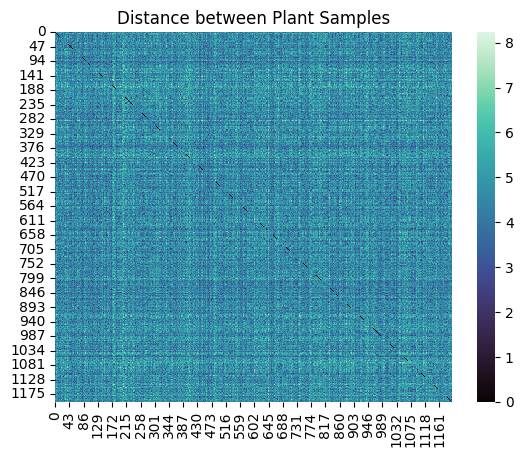

In [5]:
d_mat = pdist(X)
sns.heatmap(squareform(d_mat),cmap='mako')
plt.title("Distance between Plant Samples")

In [6]:
single = h.linkage(d_mat)
average = h.linkage(d_mat, method='average')
complete = h.linkage(d_mat, method='complete')

### Single Link Dendogram

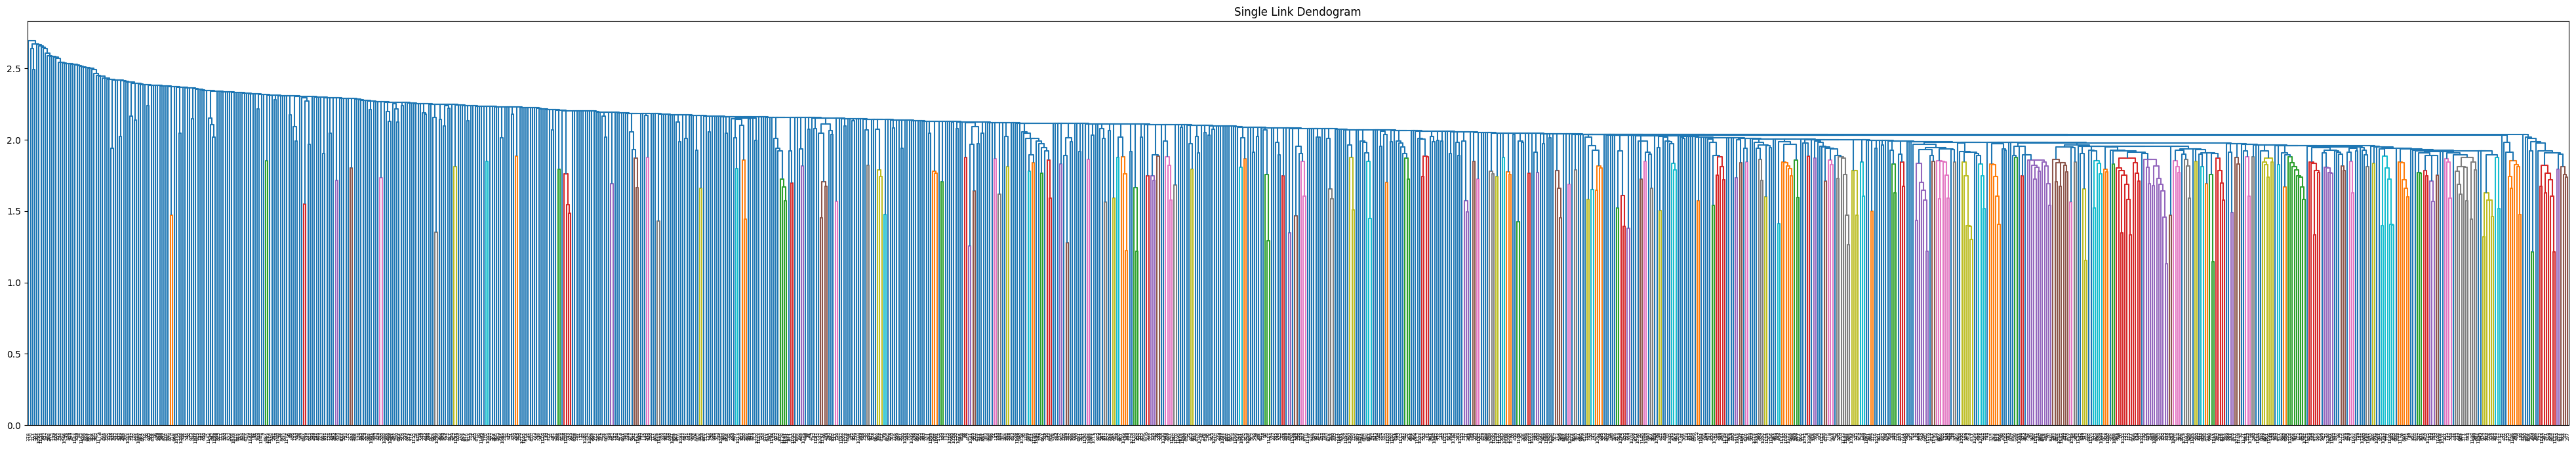

In [7]:
plt.figure(figsize=(50,8))
h.dendrogram(single)
plt.title("Single Link Dendogram")
plt.show()

### Average Link Dendogram

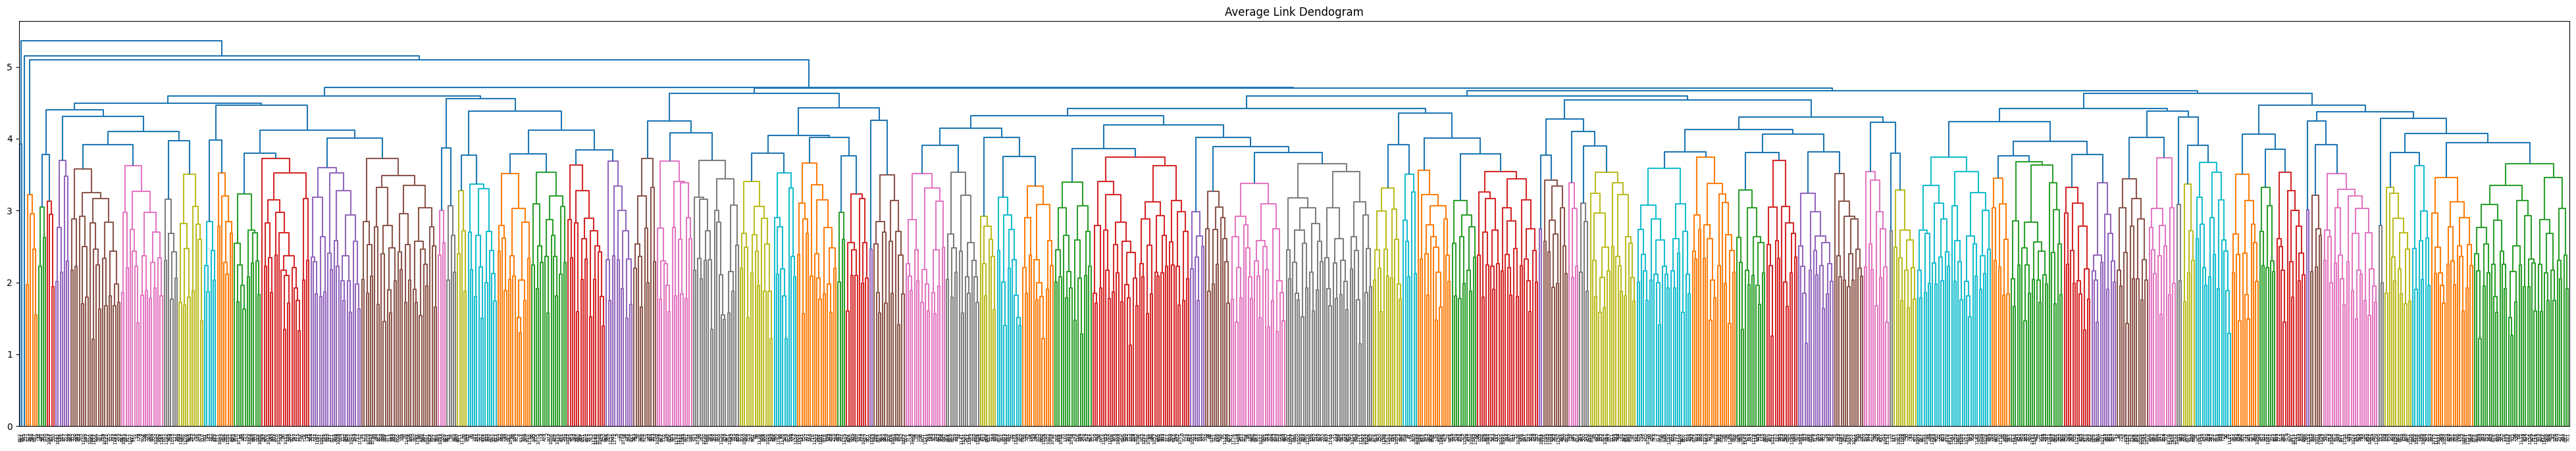

In [8]:
plt.figure(figsize=(50,8))
h.dendrogram(average)
plt.title("Average Link Dendogram")
plt.show()

### Complete Link Dendogram

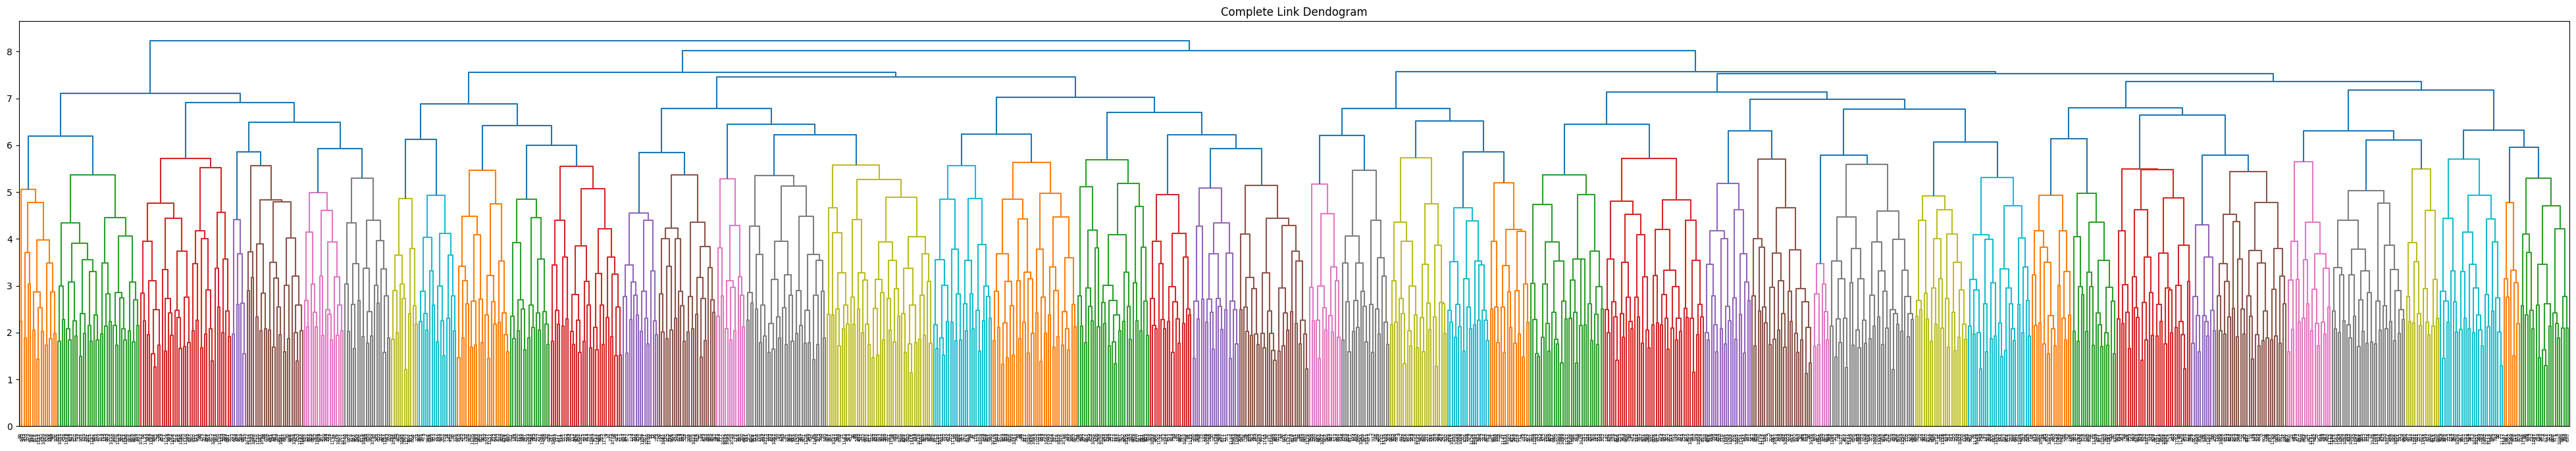

In [9]:
plt.figure(figsize=(50,8))
h.dendrogram(complete)
plt.title("Complete Link Dendogram")
plt.show()

Of the three methods, the worst looking dendogram is single.  Most clusters are formed near the leaves of the tree, implying small clusters.  Complete and average linkage were able to find much larger clusters. This implies better performance.

### Average Linkage

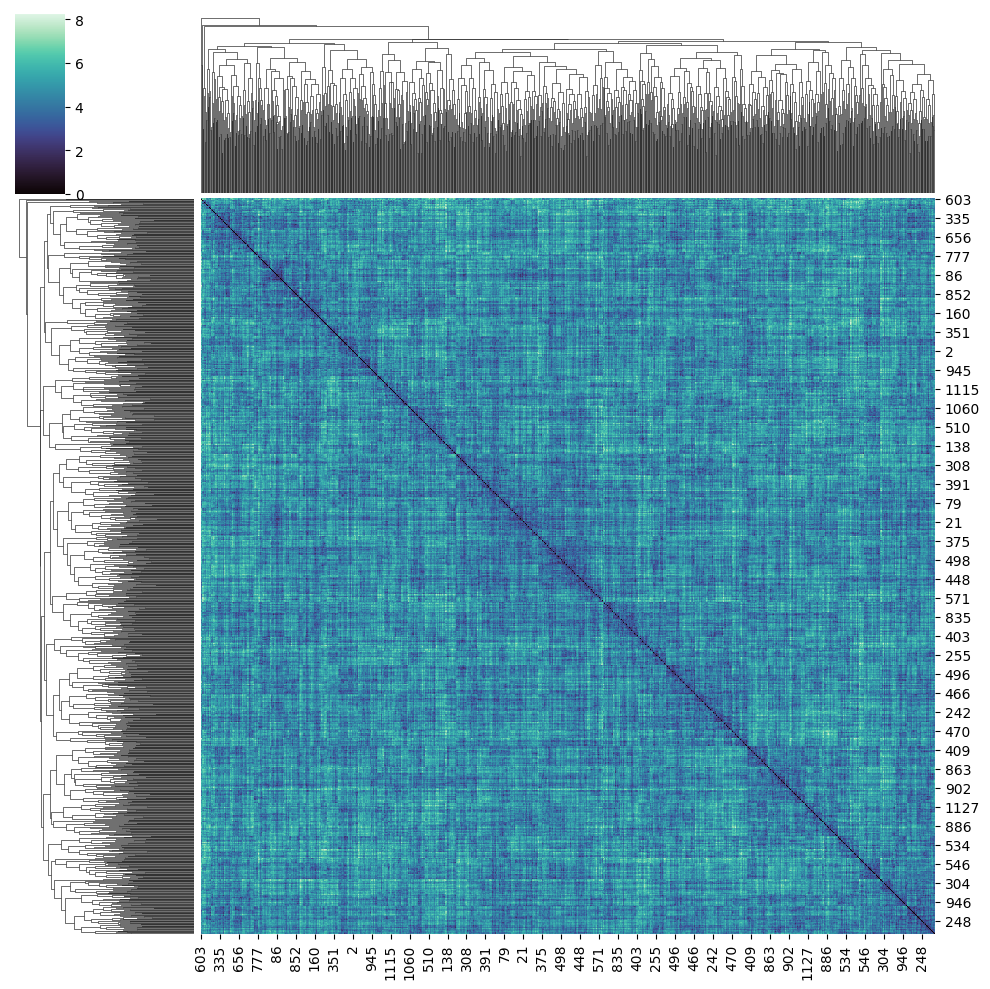

In [10]:
sns.clustermap(
    squareform(d_mat),row_linkage=average,col_linkage=average,cmap = 'mako'
)
plt.show()

### Complete Linkage

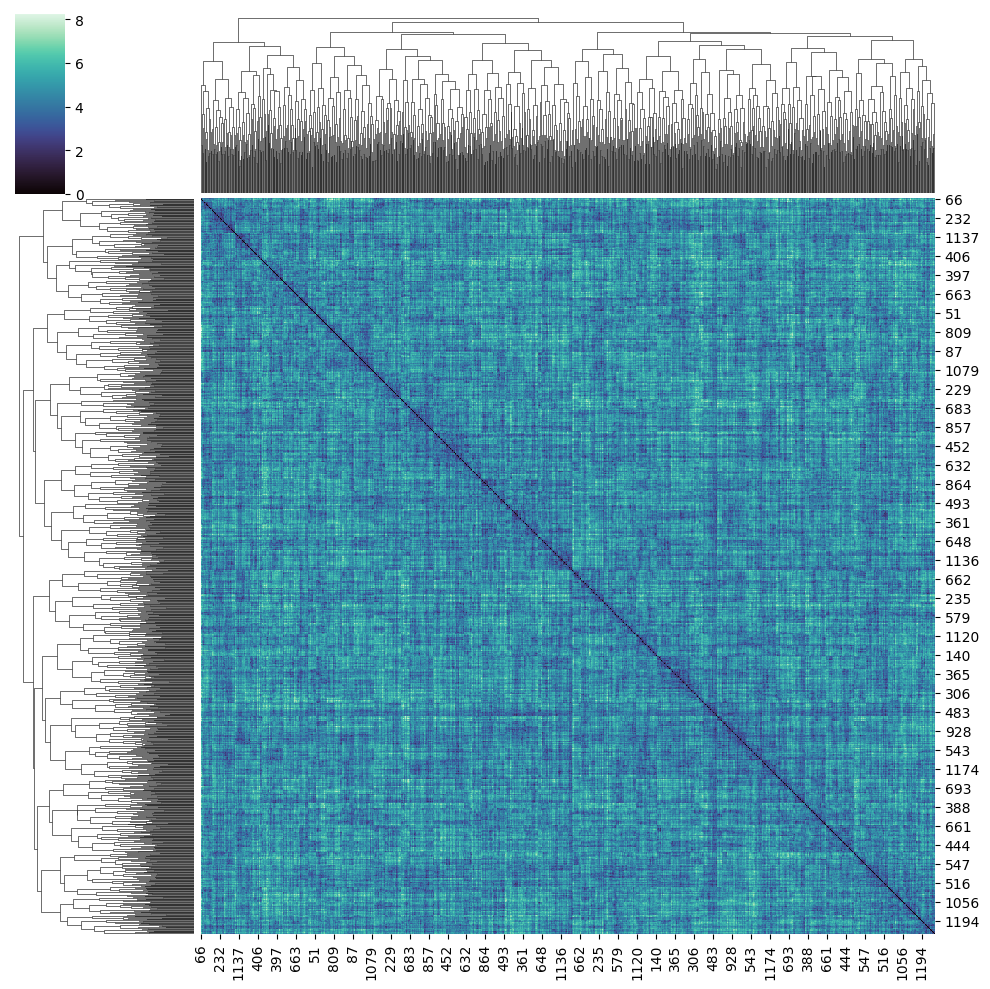

In [11]:
sns.clustermap(
    squareform(d_mat),row_linkage=complete,col_linkage=complete,cmap = 'mako'
)
plt.show()

Neither method produces strong block structures.  Suggesting there aren't sub regions of the distance matrix that are more similar.  The complete method creates slightly strong structure.  Therefore, I'll use that method to compute the best flat clustering

In [12]:
scores = []
for t in range(2,20):
    labels = h.fcluster(complete, t = t,criterion='maxclust')
    score = silhouette_score(X, labels)
    scores.append(score)

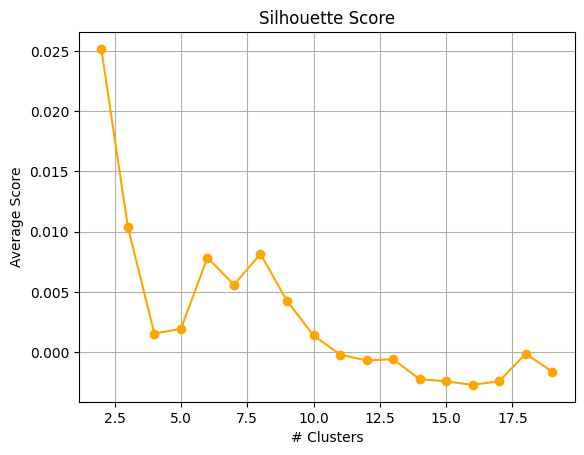

In [13]:
plt.plot(np.arange(2,20),scores, '-o', c = 'orange')
plt.title("Silhouette Score")
plt.xlabel("# Clusters")
plt.ylabel("Average Score")
plt.grid()
plt.show()

Clusterings from 2-5 get worse and worse. However, there is a peak at 8.  Since low number of clusters are less interesting we chose 8 as the number of clusters. However, our data has little to no clustering behaviour. The Silhouette score is basically 0 for all numbers of clusters.